# EDA and Simple Food Recommender
This notebook explores the discounted food items dataset and builds a simple content-based recommender system.
The goal is to suggest discounted items to customers based on category similarity.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load dataset
data = pd.read_csv('prufa.csv')

#  overview
print(f"Shape of dataset: {data.shape}")
print("\nColumn names:")
print(data.columns)

data.head()


Shape of dataset: (904, 9)

Column names:
Index(['zip_code', 'broad_category', 'least_category', 'mid_category',
       'fine_category', 'final_category', 'original_price', 'new_price',
       'discount'],
      dtype='object')


,zip_code,broad_category,least_category,mid_category,fine_category,final_category,original_price,new_price,discount
0,8000,Dairy And Cold Storage,Ready To Eat Meals,Sandwiches Wraps,Unknown,Sandwiches Wraps,22.95,14.0,8.95
1,8000,Bread And Cakes,Crackers Crisp Bread,Crisp Bread,Unknown,Crisp Bread,25.00,16.0,9.00
2,8000,Bread And Cakes,Light Breads Dark Breads,Toast Breads,Unknown,Toast Breads,25.00,13.0,12.00
3,8000,Bread And Cakes,Light Breads Dark Breads,Toast Breads,Unknown,Toast Breads,14.95,8.0,6.95
4,8000,Bread And Cakes,Rye Breads,Rye Breads With Carrots,Unknown,Rye Breads With Carrots,14.95,8.0,6.95


In [29]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop duplicates
data = data.drop_duplicates()
print(f"\nShape after dropping duplicates: {data.shape}")


# Step 7: Remove rows where 'fine_category' == 'Unknown'
initial_shape = data.shape
data = data[data['fine_category'] != 'Unknown']
print(f"\nRemoved 'Unknown' fine_category entries. New shape: {data.shape} (removed {initial_shape[0] - data.shape[0]} rows)")




Missing values per column:
zip_code          0
broad_category    0
least_category    0
mid_category      0
fine_category     0
final_category    0
original_price    0
new_price         0
discount          0
dtype: int64

Shape after dropping duplicates: (765, 9)

Removed 'Unknown' fine_category entries. New shape: (765, 9) (removed 0 rows)


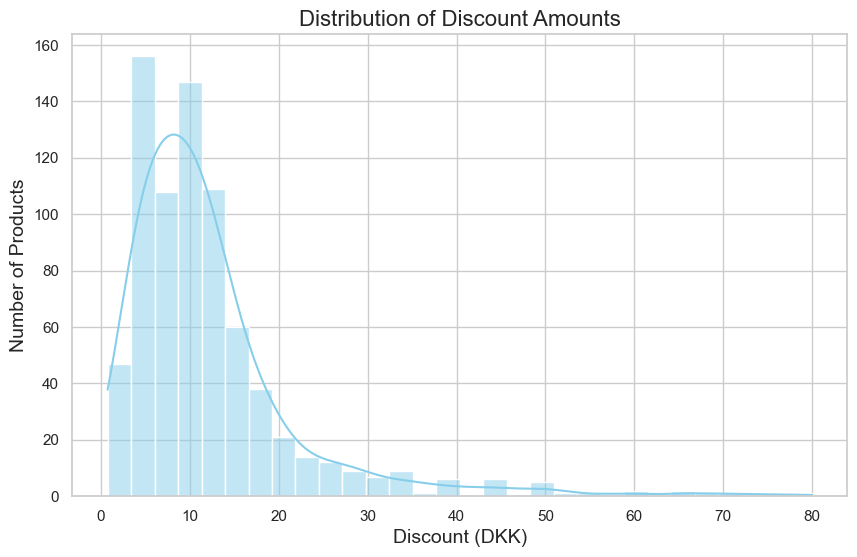

In [19]:
# Plot Discount Distribution

plt.figure(figsize=(10,6))
sns.histplot(data['discount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Discount Amounts', fontsize=16)
plt.xlabel('Discount (DKK)', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.grid(True)
plt.show()


C:\Users\Notandi\AppData\Local\Temp\ipykernel_16684\3188358102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_by_broad.values, y=avg_discount_by_broad.index, palette="viridis")


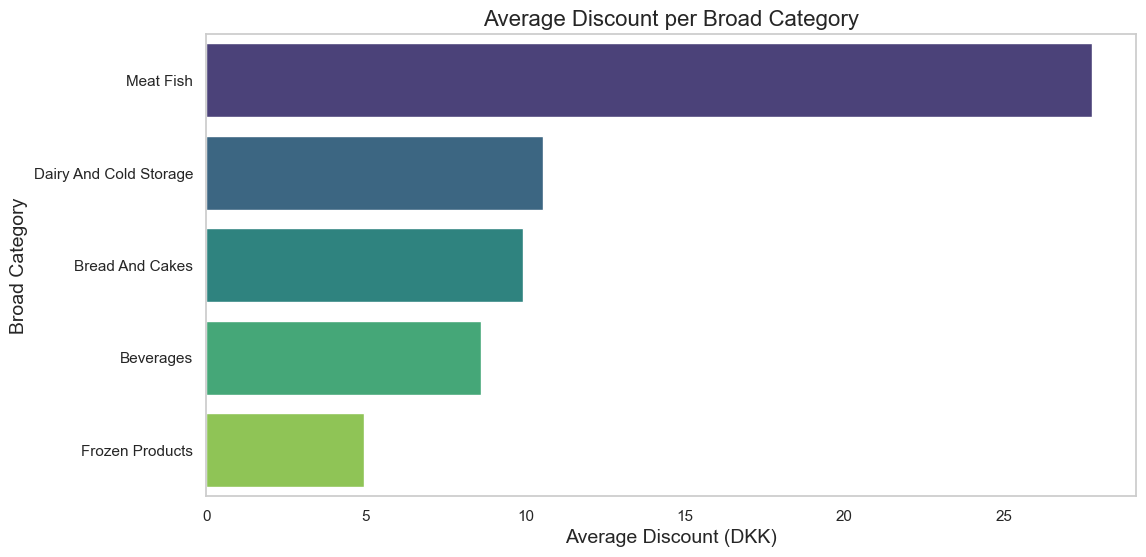

In [20]:
# Calculate average discount per broad_category
avg_discount_by_broad = data.groupby('broad_category')['discount'].mean().sort_values(ascending=False)

# Plot average discount
plt.figure(figsize=(12,6))
sns.barplot(x=avg_discount_by_broad.values, y=avg_discount_by_broad.index, palette="viridis")
plt.title('Average Discount per Broad Category', fontsize=16)
plt.xlabel('Average Discount (DKK)', fontsize=14)
plt.ylabel('Broad Category', fontsize=14)
plt.grid(axis='x')
plt.show()


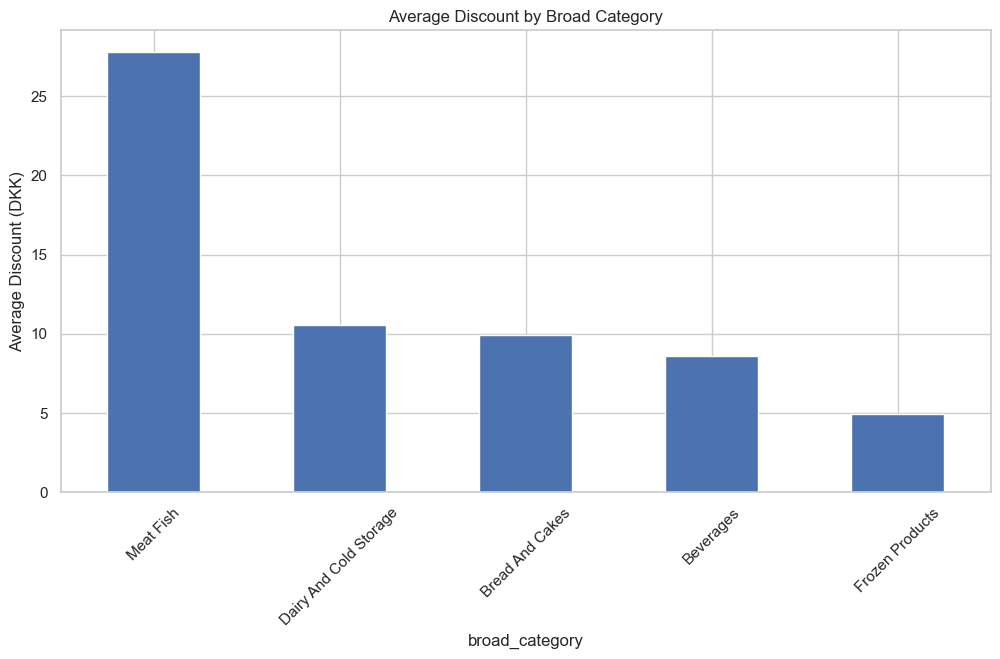

In [21]:
broad_discount = data.groupby('broad_category')['discount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
broad_discount.plot(kind='bar')
plt.title('Average Discount by Broad Category')
plt.ylabel('Average Discount (DKK)')
plt.xticks(rotation=45)
plt.show()


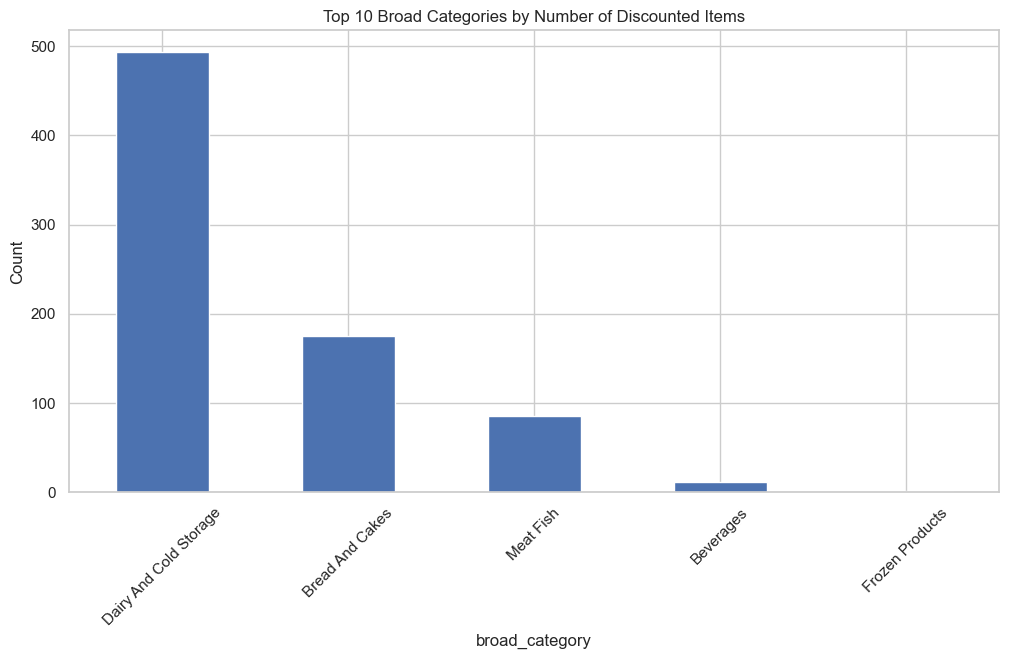

In [28]:
top_categories = data['broad_category'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_categories.plot(kind='bar')
plt.title('Top 10 Broad Categories by Number of Discounted Items')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Exploratory Data Analysis (EDA)

We explore the distribution of discounts across products and categories to better understand where food waste reduction efforts can be most effective.

C:\Users\Notandi\AppData\Local\Temp\ipykernel_16684\301350709.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_broad_categories.values, y=top_broad_categories.index, palette="coolwarm")


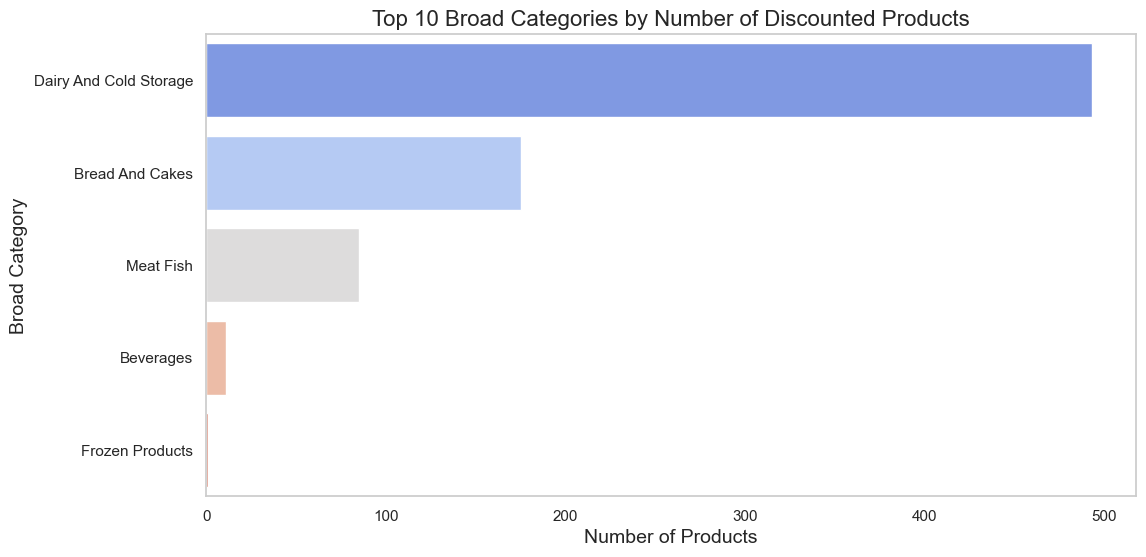

In [22]:
# count number of discounted items per broad_category
top_broad_categories = data['broad_category'].value_counts().head(10)

# Plot the top categories
plt.figure(figsize=(12,6))
sns.barplot(x=top_broad_categories.values, y=top_broad_categories.index, palette="coolwarm")
plt.title('Top 10 Broad Categories by Number of Discounted Products', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Broad Category', fontsize=14)
plt.grid(axis='x')
plt.show()


# Example: Top discounted items from 'Bread And Cakes'

In [30]:
# imple Content-Based Recommender

def recommend_products(broad_category_selected, top_n=5):
    """
    Recommend top discounted products within the same broad category.
    
    Parameters:
        broad_category_selected (str): The broad category user is interested in
        top_n (int): Number of recommendations to return
        
    Returns:
        pd.DataFrame: Top discounted products in the selected category
    """
    # Filter the data to the selected category
    filtered_data = data[data['broad_category'] == broad_category_selected]
    
    # Sort by discount descending
    recommendations = filtered_data.sort_values(by='discount', ascending=False).head(top_n)
    
    return recommendations[['final_category', 'original_price', 'new_price', 'discount', 'zip_code']]

# Step 15: Example Usage
example_category = 'Meat Fish'  # You can change this to any broad category
recommend_products(example_category)


,final_category,original_price,new_price,discount,zip_code
388,Roasted Whole Beef Pieces,135.0,55.00,80.00,2300
461,Minced Pork,135.0,59.95,75.05,2300
213,spareribs Barbecue Meat,119.0,47.00,72.00,2100
325,Meat Fish,149.0,80.00,69.00,2200
209,spareribs Barbecue Meat,119.0,53.00,66.00,2100


# Conclusions

- The dataset contains discounted food items from various categories in Danish supermarkets.
- Significant discounts are observed in categories like 'Bread And Cakes' and 'Dairy And Cold Storage'.
- A simple content-based recommender system was built to suggest top discounted products based on user category preference.
- This basic recommender can help reduce food waste by promoting near-expiry items that match customer interests.

# Next Steps

- Use embeddings to recommend similar products even across different categories.
- Integrate recipe recommendations by combining multiple products.
- Introduce optimization to create food packs under budget constraints.
